In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# PREZZI GME

Importo i dati dal 2017 al 2020 ([source](https://www.mercatoelettrico.org/it/download/DatiStorici.aspx)).
N.B: occorre esportare i file excel in csv (e sostituire all'occorrenza le virgole e i punti e virgola)

In [2]:
def function(filename):
    df = pd.read_csv(path_root + filename, usecols=['Data/Date (YYYYMMDD)', 'Ora/Hour', 'PUN'])
    df['date'] = pd.to_datetime(df['Data/Date (YYYYMMDD)'], format='%Y%m%d')
    df = df.drop(columns=['Data/Date (YYYYMMDD)']).rename(columns={'Ora/Hour': 't'}).pivot(index='date', columns='t', values='PUN').drop(columns=[25]).fillna(method='bfill')
    return df

In [3]:
path_root = 'Profili/Prezzi_GME/'

In [4]:
directory = os.fsencode(path_root)

In [25]:
i = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if filename.endswith(".csv"):
        if i == 0:
            result = function(filename)
            i += 1
        else:
            r = function(filename)
            result = result.add(r, fill_value=0)

In [26]:
result

t              1      2      3      4      5      6      7      8      9   \
date                                                                        
2017-01-01  53.30  52.00  51.00  47.27  45.49  45.69  48.07  45.67  45.48   
2017-01-02  53.00  50.18  49.11  48.15  48.41  48.15  52.00  60.30  65.09   
2017-01-03  50.56  47.09  44.43  44.70  44.82  46.13  52.99  58.09  59.57   
2017-01-04  58.33  54.97  53.72  52.00  51.36  53.02  59.22  63.60  66.04   
2017-01-05  44.93  41.98  43.04  41.44  38.12  42.26  49.36  59.98  60.85   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-27  36.87  35.04  35.20  34.87  34.86  36.63  43.11  46.64  47.75   
2019-12-28  36.92  34.42  30.00  27.40  27.37  27.40  28.91  35.00  39.00   
2019-12-29  30.60  28.10  25.00  20.55  20.00  21.31  22.72  25.10  27.52   
2019-12-30  26.06  23.46  22.00  15.07  15.68  21.70  30.00  40.99  43.91   
2019-12-31  37.55  34.22  30.95  29.80  28.59  34.67  42.00  46.41  45.88   

t              10  ...     15     16     17     18     19     20     21  \
date               ...                                                    
2017-01-01  42.06  ...  46.91  49.43  50.94  54.26  60.95  63.42  58.42   
2017-01-02  62.67  ...  59.10  58.40  61.23  74.09  78.01  77.26  71.28   
2017-01-03  58.60  ...  57.43  60.54  62.69  67.01  63.57  60.40  61.94   
2017-01-04  65.72  ...  62.16  61.52  63.69  66.71  71.09  67.08  65.97   
2017-01-05  61.49  ...  54.67  56.97  61.14  68.40  66.57  63.22  59.40   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2019-12-27  48.90  ...  47.62  49.73  52.68  60.78  59.78  59.40  56.39   
2019-12-28  36.82  ...  34.58  35.86  40.00  44.00  43.75  44.25  41.00   
2019-12-29  30.04  ...  30.80  32.86  35.64  41.00  43.50  43.98  41.03   
2019-12-30  42.42  ...  40.00  41.23  44.68  48.47  52.44  53.78  48.51   
2019-12-31  45.17  ...  40.84  49.03  52.11  58.26  59.28  56.48  53.24   

t              22     23     24  
date                             
2017-01-01  57.27  54.35  52.50  
2017-01-02  61.61  56.25  52.23  
2017-01-03  61.42  58.97  54.95  
2017-01-04  62.42  58.12  53.54  
2017-01-05  57.82  57.08  53.23  
...           ...    ...    ...  
2019-12-27  49.07  45.16  36.85  
2019-12-28  35.39  34.75  30.17  
2019-12-29  35.03  34.30  28.94  
2019-12-30  42.94  38.27  37.55  
2019-12-31  50.68  48.61  42.30  

[1095 rows x 24 columns]

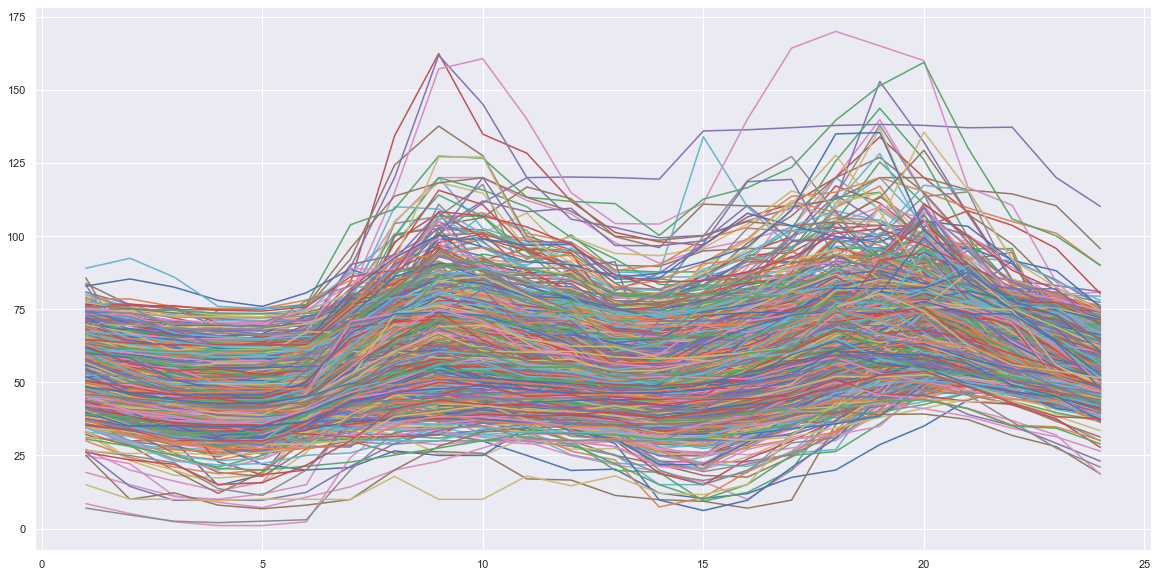

In [29]:
plt.figure(figsize=(20,10))
for i, (index, row) in enumerate(result.iterrows()):
    plt.plot(row)

##### Export in csv

In [27]:
result.to_csv('Profili/processed_prices.csv')

In [28]:
np.save('Profili/processed_prices.npy', result.to_numpy())